In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
pd.set_option('display.float_format', '{:.2f}'.format)

Exercise 1 : Understanding Data Visualization

In [4]:
# Visualizations make data easier to understand and interpret. It helps in identifying patterns, trends, and anomalies, making complex data more accessible.
# Line plots are used to display quantitative values over a continuous interval or time span. They are ideal for showing trends and changes over time.

Exercise 2 : Creating A Line Plot For Temperature Variation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


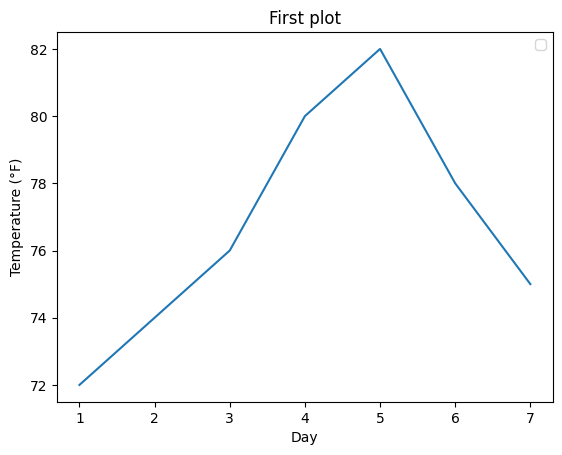

In [7]:
temp = [72, 74, 76, 80, 82, 78, 75]
days = [1, 2, 3, 4, 5, 6, 7]
plt.plot(days, temp)
plt.xlabel('Day')
plt.ylabel('Temperature (°F)')
plt.title('First plot')
plt.show()

Exercise 3 : Visualizing Monthly Sales With A Bar Chart

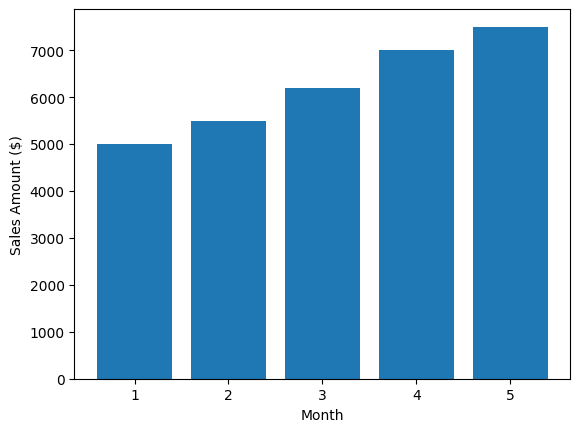

In [9]:
sales_amount = [5000, 5500, 6200, 7000, 7500]
months = [1, 2, 3, 4, 5]
plt.bar(months, sales_amount)
plt.xlabel('Month')
plt.ylabel('Sales Amount ($)')
plt.show()

Exercise 4 : Data Visualisation

Calculate the total quantity of products sold by the company.

In [15]:
df= pd.read_csv('https://raw.githubusercontent.com/intern2grow/sales-data-analysis/main/sales_data.csv')
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.00,10.00,6000.00
1,2022-01-01,Laptop,Electronics,1200.00,5.00,6000.00
2,2022-01-02,T-Shirt,Clothing,20.00,50.00,1000.00
3,2022-01-03,Headphones,Electronics,100.00,20.00,2000.00
4,2022-01-04,T-Shirt,Clothing,20.00,25.00,500.00


In [24]:
df_temp = df.copy()

In [25]:
df_temp.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [30]:
df_temp.dropna(inplace=True)
print(df_temp.isnull().sum())

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64


In [26]:
df_temp.duplicated().sum()

1

In [28]:
print(df_temp.shape)
df_temp = df_temp.drop_duplicates()
print(df_temp.shape)

(369, 6)
(368, 6)


Calculate the total quantity of products sold by the company.

In [16]:
total_quantity = df_temp['quantity'].sum()
print(total_quantity)

5360.0


Identify the category that had the highest revenue and calculate how much revenue it generated.

In [21]:
data_temp = df_temp.pivot_table(index='category', values='revenue', aggfunc='sum')
data_temp.sort_values(by='revenue', ascending=False)

,revenue
category,
Electronics,516080.00
Accessories,104700.00
Clothing,94350.00
Shoes,20640.00
Bags,19500.00
Clohting,1200.00
Shoeses,960.00
Bgas,900.00


In [31]:
# i'll replace wrong names (hidden duplicates) in category 
df_temp['category'].unique()

array(['Electronics', 'Clothing', 'Accessories', 'Bags', 'Shoes',
       'Clohting', 'Bgas', 'Shoeses'], dtype=object)

In [32]:
df_temp = df_temp.replace({'Bgas': 'Bags', 'Clohting': 'Clothing', 'Shoeses': 'Shoes'})

In [33]:
df_temp['category'].unique()

array(['Electronics', 'Clothing', 'Accessories', 'Bags', 'Shoes'],
      dtype=object)

In [34]:
# now it would be correct
data_temp = df_temp.pivot_table(index='category', values='revenue', aggfunc='sum')
data_temp.sort_values(by='revenue', ascending=False)

,revenue
category,
Electronics,509480.00
Accessories,101400.00
Clothing,94350.00
Shoes,21600.00
Bags,20400.00


Determine the average revenue per sale in the dataset.

In [36]:
avg_rev_sale = df_temp['revenue'].sum()/df_temp['quantity'].sum()
print(avg_rev_sale)

141.78937381404174


Create a bar chart to visualize the total revenue generated in each quarter of the year (Q1, Q2, Q3, Q4).

In [41]:
df_temp['date'] = pd.to_datetime(df_temp['date'])
df_temp['quarter'] = df_temp['date'].dt.quarter

In [43]:
quart_revenue = df_temp.groupby('quarter')['revenue'].sum()

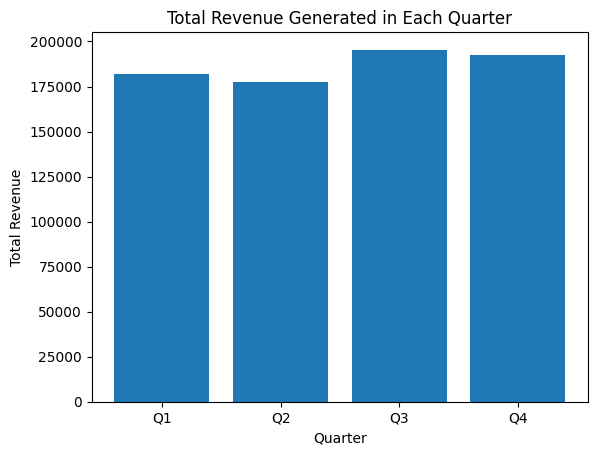

In [45]:
plt.bar(quart_revenue.index, quart_revenue.values)
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated in Each Quarter')
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4']) 
plt.show()

Exercise 5 : Data Visualisation Using MatPlotLib

Create a simple line plot using Matplotlib. Plot the function y = x^2 for x values ranging from -10 to 10. Add a title and label the x and y axes.

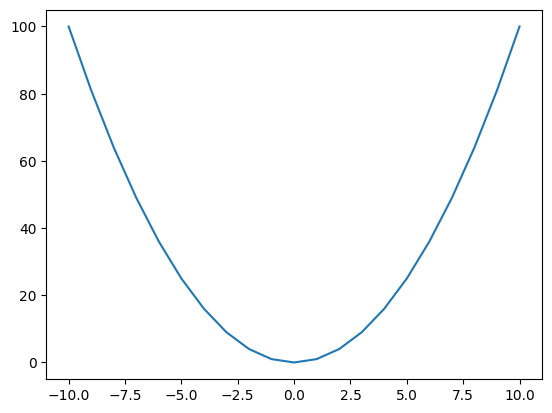

In [53]:
x = np.arange(-10, 11)
y = x ** 2
plt.plot(x ,y)
plt.show()

Generate a bar chart to display the sales data of four different products (A, B, C, D) in a week. The sales values are 15, 30, 45, and 20 respectively. Label the chart appropriately.

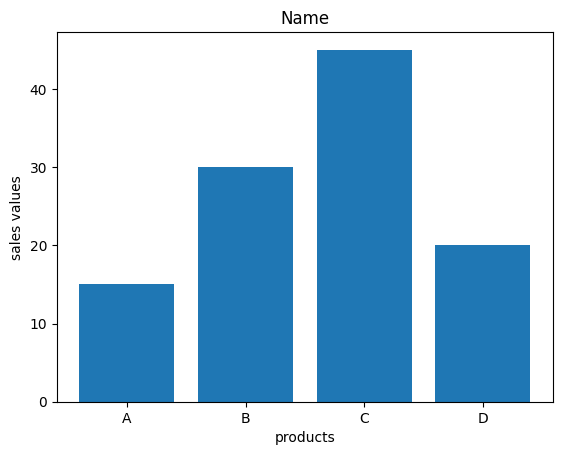

In [56]:
products = ['A', 'B', 'C', 'D']
sales_value = [15, 30, 45, 20]
plt.bar(products, sales_value)
plt.xlabel('products')
plt.ylabel('sales values')
plt.title('Name')
plt.show()

Create a pie chart representing the following data about favorite fruits of a group of people: Apples (40%), Bananas (30%), Cherries (20%), and Dates (10%). Customize the chart with different colors for each fruit and add a legend.

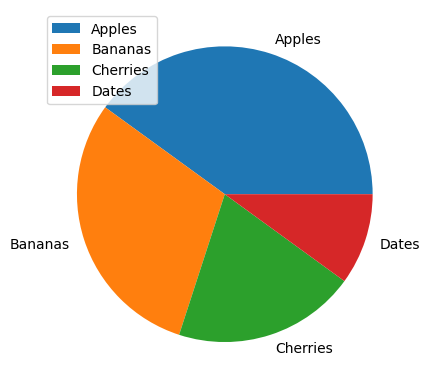

In [67]:
fruits = ['Apples', 'Bananas', 'Cherries', 'Dates']
values = [0.4, 0.3, 0.2, 0.1]
plt.pie(values, labels=fruits)
plt.legend(loc = 'upper left')
plt.show()